<a href="https://colab.research.google.com/github/schatz06/EPL448_Project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Map Driver##

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

##Import Packages ## 

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
import pandas.plotting as pdplt

##Read Data##

In [3]:
train_data = pd.read_excel('Data_Train.xlsx') # read training data
test_data  = pd.read_excel('Data_Test.xlsx') # read test data

Check for corrupted or empty records

In [4]:
print("Problematic records in training data: ",train_data.isnull().sum().sum())
print("Problematic records in test data: ",test_data.isnull().sum().sum())

Problematic records in training data:  0
Problematic records in test data:  0


##Train Data Preprocessing##

Dataset Shape

In [5]:
print(train_data.shape)

(6237, 9)


Peek of the data

In [6]:
train_data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


Data type for each column

In [7]:
print(train_data.dtypes)

Title            object
Author           object
Edition          object
Reviews          object
Ratings          object
Synopsis         object
Genre            object
BookCategory     object
Price           float64
dtype: object


Statistical summary

In [8]:
print(train_data.describe())

              Price
count   6237.000000
mean     560.707516
std      690.110657
min       25.000000
25%      249.180000
50%      373.000000
75%      599.000000
max    14100.000000


Reviews Normalization

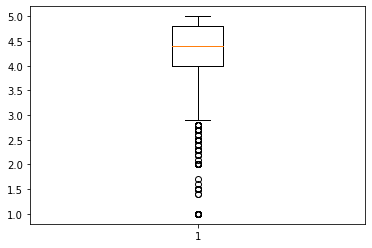

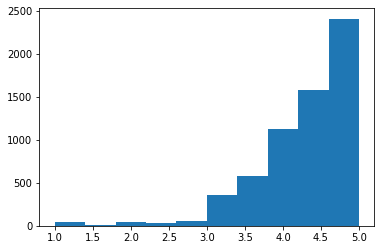

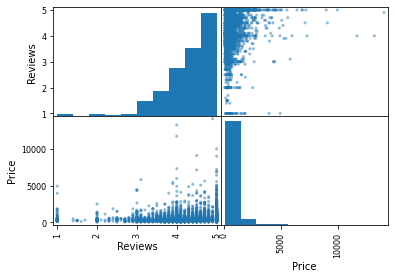

In [9]:
train_data['Reviews'] = train_data.Reviews.apply(lambda r: float(r.split()[0])) # get only the review rule 
plt.boxplot(train_data['Reviews'])
plt.show()
plt.hist(train_data['Reviews'])
plt.show()
pdplt.scatter_matrix(train_data[['Reviews','Price']])
plt.show()
train_data['Reviews'] = (train_data.Reviews - train_data.Reviews.min())/(train_data.Reviews.max() - train_data.Reviews.min()) # normalize reviews 


Ratings Normalization

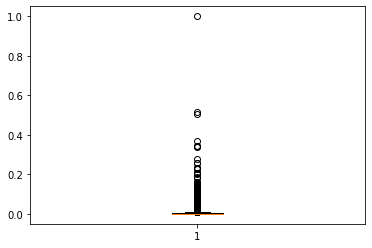

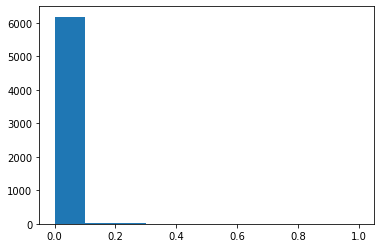

In [10]:
train_data['Ratings'] = train_data.Ratings.apply(lambda r: float(r.split()[0].replace(',',''))) # get only the rating 
train_data['Ratings'] = (train_data.Ratings - train_data.Ratings.min())/(train_data.Ratings.max() - train_data.Ratings.min()) # normalize rating 
plt.boxplot(train_data['Ratings'])
plt.show()
plt.hist(train_data['Ratings'])
plt.show()

Drop Title & Author & Synopsis & Genre columns

In [11]:
train_data.pop('Author')
train_data.pop('Title')
train_data.pop('Synopsis')
train_data.pop('Genre')

0         Action & Adventure (Books)
1         Cinema & Broadcast (Books)
2            International Relations
3       Contemporary Fiction (Books)
4              Photography Textbooks
                    ...             
6232            Anthropology (Books)
6233    Contemporary Fiction (Books)
6234                 Romance (Books)
6235      Action & Adventure (Books)
6236      Action & Adventure (Books)
Name: Genre, Length: 6237, dtype: object

Edition Normalization / Drop edition

In [12]:
#train_data['Edition'] = train_data.Edition.apply(lambda r: r.split(',')[0]) # get only the type of book e.g Paperback or Hardcover
#train_data= pd.get_dummies(train_data, columns= ['Edition'])
train_data.pop('Edition')

0       Paperback,– 10 Mar 2016
1        Paperback,– 7 Nov 2012
2       Paperback,– 25 Feb 1982
3        Paperback,– 5 Oct 2017
4       Hardcover,– 10 Oct 2006
                 ...           
6232     Paperback,– 8 Aug 2018
6233    Paperback,– 21 Nov 2016
6234     Paperback,– 8 Jun 2006
6235    Paperback,– 15 Jan 2015
6236    Paperback,– 21 Dec 2016
Name: Edition, Length: 6237, dtype: object

Book Category Normalization / Extract Categories

In [13]:
train_data= pd.get_dummies(train_data, columns= ['BookCategory'],drop_first=True)

Finish training inputs(z)

In [14]:
z = train_data

In [15]:
train_data.head()

,Reviews,Ratings,Price,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports
0,0.750,0.001150,220.00,0,0,0,0,0,0,0,0,0,0
1,0.725,0.002135,202.93,0,1,0,0,0,0,0,0,0,0
2,0.950,0.000821,299.00,0,0,0,0,0,1,0,0,0,0
3,0.775,0.001971,180.00,0,0,0,0,1,0,0,0,0,0
4,1.000,0.000000,965.62,1,0,0,0,0,0,0,0,0,0


##Test Data Preprocessing##

Reviews Normalization

In [16]:
test_data['Reviews'] = test_data.Reviews.apply(lambda r: float(r.split()[0])) # get only the review rule 
test_data['Reviews'] = (test_data.Reviews - test_data.Reviews.mean())/(test_data.Reviews.std()) # normalize reviews 

Ratings Normalization

In [17]:
test_data['Ratings'] = test_data.Ratings.apply(lambda r: float(r.split()[0].replace(',',''))) # get only the rating 
test_data['Ratings'] = (test_data.Ratings - test_data.Ratings.mean())/(test_data.Ratings.std()) # normalize rating 

Drop Title & Author & Synopsis & Genre columns

In [18]:
test_data.pop('Author')
test_data.pop('Title')
test_data.pop('Synopsis')
test_data.pop('Genre')

0                            Short Stories (Books)
1                      Operating Systems Textbooks
2                                  Romance (Books)
3       Programming & Software Development (Books)
4                              Linguistics (Books)
                           ...                    
1555                                        Design
1556                  Children's Reference (Books)
1557                                Humour (Books)
1558                         United States History
1559                                  Dictionaries
Name: Genre, Length: 1560, dtype: object

Edition Normalization / Drop edition 

In [19]:
#test_data['Edition'] = test_data.Edition.apply(lambda r: r.split(',')[0]) # get only the type of book e.g Paperback or Hardcover
#test_data= pd.get_dummies(test_data, columns= ['Edition'])
test_data.pop('Edition')

0       Mass Market Paperback,– 1 Oct 1986
1          Paperback,– Import, 26 Apr 2018
2                  Paperback,– 17 Mar 2011
3                         Paperback,– 2016
4                  Paperback,– 26 Dec 2011
                       ...                
1555               Paperback,– 14 Apr 2011
1556                Paperback,– 8 May 2013
1557                Paperback,– 6 Sep 2011
1558               Paperback,– 22 Sep 2009
1559               Paperback,– 16 Sep 2016
Name: Edition, Length: 1560, dtype: object

Book Category Normalization / Extract Categories

In [20]:
test_data= pd.get_dummies(test_data, columns= ['BookCategory'],drop_first=True)

Finish Test set Inputs

In [21]:
z_test = test_data
z_test.head()

,Reviews,Ratings,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports
0,0.140178,5.627725,0,0,0,0,1,0,0,0,0,0
1,1.038851,-0.198467,0,0,0,1,0,0,0,0,0,0
2,1.038851,-0.180241,0,0,0,0,0,0,0,0,1,0
3,-0.309159,-0.137714,0,0,0,1,0,0,0,0,0,0
4,0.140178,-0.149865,0,0,0,0,0,0,1,0,0,0


##Training Feed Forward Model##

Split Train Set in Train  & Validation Sets(70/30)

In [22]:
############# inputs to the neural network #######################
train_set = z.sample(frac=0.7,random_state=200)
validation_set = z.drop(train_set.index)
######################### normalized target outputs for training set##########
y_train_set = train_set.pop('Price')
y_train_set_max = y_train_set.max()
y_train_set_min = y_train_set.min()
y_train_set = (y_train_set - y_train_set_min) /( y_train_set_max - y_train_set_min)

########################## normalized target outputs for validation set #######
y_validation_set = validation_set.pop('Price')
y_validation_set_max = y_validation_set.max()
y_validation_set_min = y_validation_set.min()
y_validation_set = (y_validation_set - y_validation_set_min) /( y_validation_set_max - y_validation_set_min)

Import tensorflow

In [23]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


Build model/neural network

In [24]:
# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=32, activation='sigmoid', input_shape=(train_set.shape[1],)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=32, activation='sigmoid'))

# Add fully connected layer with no activation function
network.add(layers.Dense(units=1,activation='sigmoid'))

In [25]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                416       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,505
Trainable params: 1,505
Non-trainable params: 0
_________________________________________________________________


Compile model

In [26]:
# Compile neural network
network.compile(loss='mse', # Mean squared error
                optimizer='RMSprop', # Optimization algorithm
                ) # Mean squared error

Model Training

In [27]:
# Train neural network
history = network.fit(train_set, # Features
                      y_train_set, # Target vector
                      epochs=30, # Number of epochs
                      verbose=1, # Output
                      batch_size=100, # Number of observations per batch
                      validation_data=(validation_set,y_validation_set)) # Data for evaluation

Epoch 1/30
44/44 [==============================] - 1s 12ms/step - loss: 0.0629 - val_loss: 0.0093
Epoch 2/30
44/44 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0035
Epoch 3/30
44/44 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0033
Epoch 4/30
44/44 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0033
Epoch 5/30
44/44 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0032
Epoch 6/30
44/44 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0032
Epoch 7/30
44/44 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.0032
Epoch 8/30
44/44 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 0.0032
Epoch 9/30
44/44 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0031
Epoch 10/30
44/44 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0032
Epoch 11/30
44/44 

##Predict Prices Using Feed Forward Neural Network##

Predict

In [ ]:
predictions = network.predict(z_test)


Denormalize

In [29]:
actual_prices = (predictions*(y_train_set_max - y_train_set_min)) + y_train_set_min

Save prediction to Excel File

In [30]:
df = pd.DataFrame(actual_prices.astype(int))
df.columns=['Price']
filepath = 'Predictions.xlsx'
df.to_excel(filepath, index=False)
df.head()

,Price
0,141
1,1074
2,391
3,688
4,396


##Radial Basis Function## 

Create custom RBF Layer

In [31]:
from keras.layers import Layer
from keras import backend as K

class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
#         print(input_shape)
#         print(self.units)
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

Create Network

In [32]:
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.losses import binary_crossentropy


# Start neural network
network2 = models.Sequential()

network2.add(layers.Dense(units=50, activation='sigmoid', input_shape=(train_set.shape[1],)))

network2.add(RBFLayer(400, 0.4))

# Add fully connected layer with no activation function
network2.add(layers.Dense(units=1,activation='sigmoid'))

network2.compile(optimizer='rmsprop', loss=binary_crossentropy)

In [33]:
# Train neural network
history2 = network2.fit(train_set, # Features
                      y_train_set, # Target vector
                      epochs=40, # Number of epochs
                      verbose=1, # Output
                      batch_size=100, # Number of observations per batch
                      validation_data=(validation_set,y_validation_set)) # Data for evaluation

Epoch 1/40
44/44 [==============================] - 2s 23ms/step - loss: 0.6130 - val_loss: 0.3292
Epoch 2/40
44/44 [==============================] - 1s 18ms/step - loss: 0.2556 - val_loss: 0.1760
Epoch 3/40
44/44 [==============================] - 1s 19ms/step - loss: 0.1610 - val_loss: 0.1738
Epoch 4/40
44/44 [==============================] - 1s 19ms/step - loss: 0.1642 - val_loss: 0.1715
Epoch 5/40
44/44 [==============================] - 1s 19ms/step - loss: 0.1609 - val_loss: 0.1709
Epoch 6/40
44/44 [==============================] - 1s 20ms/step - loss: 0.1645 - val_loss: 0.1715
Epoch 7/40
44/44 [==============================] - 1s 19ms/step - loss: 0.1587 - val_loss: 0.1702
Epoch 8/40
44/44 [==============================] - 1s 19ms/step - loss: 0.1590 - val_loss: 0.1703
Epoch 9/40
44/44 [==============================] - 1s 19ms/step - loss: 0.1593 - val_loss: 0.1699
Epoch 10/40
44/44 [==============================] - 1s 20ms/step - loss: 0.1571 - val_loss: 0.1696
Epoch 11/

##Predict Prices Using Radial Basis Function##

Predict

In [34]:
predictions2 = network2.predict(z_test)

Denormalize

In [35]:
actual_prices2 = (predictions2*(y_train_set_max - y_train_set_min)) + y_train_set_min

Save Predictions to Excel File

In [36]:
df2 = pd.DataFrame(actual_prices2.astype(int))
df2.columns=['Price']
filepath = 'Predictions2.xlsx'
df2.to_excel(filepath, index=False)
df2.head()

,Price
0,25
1,2217
2,1136
3,1027
4,770
